# ML pipeline for the binary classification task (Challange 1)
Developed by Pablo BETANCUR and Aron GIMESI

*For the whole history of experiments, utility classes and functions, visit the GitHub repository at:*
https://github.com/gimesia/CADx-Project
___

In [20]:
from utils.loader import FactoryLoader
from utils.ml import MLPipeline
from utils.preprocessing import PreprocessingFactory
from utils.feature_extraction import *
from utils.utils import *

VAL_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val"
TRAIN_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train"
TEST_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\test"

In [2]:
percent = 100
random = False
batch_size = 24

# Initialize the FactoryLoader
factory = PreprocessingFactory()
factory.pad2square(fill=np.nan)
factory.resize((240,240))
factory.normalize2float()

# Create the feature extraction pipeline strategy and add desired features
strategy = FeatureExtractionStrategy()

strategy.add_extractor(GradientExtractor()) # Add gradient feature

strategy.add_extractor(ColorMomentsExtractor("rgb", ))   # Add color moments feature
strategy.add_extractor(ColorMomentsExtractor("lab", ))   # Add color moments feature
strategy.add_extractor(ColorMomentsExtractor("hsv", ))   # Add color moments feature

strategy.add_extractor(LBPExtractor(radius=1, n_points=8))
strategy.add_extractor(LBPExtractor(radius=2, n_points=16))
strategy.add_extractor(LBPExtractor(radius=3, n_points=24))
strategy.add_extractor(LBPExtractor(radius=4, n_points=32))
strategy.add_extractor(LBPExtractor(radius=5, n_points=40))

strategy.add_extractor(FourierTransformExtractor())
strategy.add_extractor(FFTExtractor())

strategy.add_extractor(GLCMExtractor(properties=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', "ASM"]))

pipeline = MLPipeline(dataset_path=TRAIN_PATH, preprocessing_factory=factory, feature_strategy=strategy, classifiers=[], percentage=percent, verbose=True, shuffle=random, batch_size=batch_size)

INFO:utils.ml:MLPipeline initialized with dataset path: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train
INFO:utils.ml:Preprocessing steps


In [4]:
pipeline.run_feature_extraction()

INFO:utils.ml:Running feature extraction...


Processed 5/634 batches.
Processed 10/634 batches.
Processed 15/634 batches.
Processed 20/634 batches.
Processed 25/634 batches.
Processed 30/634 batches.
Processed 35/634 batches.
Processed 40/634 batches.
Processed 45/634 batches.
Processed 50/634 batches.
Processed 55/634 batches.
Processed 60/634 batches.
Processed 65/634 batches.
Processed 70/634 batches.
Processed 75/634 batches.
Processed 80/634 batches.
Processed 85/634 batches.
Processed 90/634 batches.
Processed 95/634 batches.
Processed 100/634 batches.
Processed 105/634 batches.
Processed 110/634 batches.
Processed 115/634 batches.
Processed 120/634 batches.
Processed 125/634 batches.
Processed 130/634 batches.
Processed 135/634 batches.
Processed 140/634 batches.
Processed 145/634 batches.
Processed 150/634 batches.
Processed 155/634 batches.
Processed 160/634 batches.
Processed 165/634 batches.
Processed 170/634 batches.
Processed 175/634 batches.
Processed 180/634 batches.
Processed 185/634 batches.
Processed 190/634 bat

INFO:utils.ml:Feature extraction completed. Extracted 15195 features.


Processed 634/634 batches.


In [57]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

xgb0 = XGBClassifier(learning_rate=0.1, n_estimators=500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb1 = XGBClassifier(learning_rate=0.1, n_estimators=1250, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=1250, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb3 = XGBClassifier(learning_rate=0.1, n_estimators=1250, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb4 = XGBClassifier(learning_rate=0.1, n_estimators=1500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb5 = XGBClassifier(learning_rate=0.1, n_estimators=1500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb6 = XGBClassifier(learning_rate=0.1, n_estimators=1500, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb7 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb8 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb9 = XGBClassifier(learning_rate=0.1, n_estimators=1000, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb10 = XGBClassifier(learning_rate=0.1, n_estimators=1250, max_depth=9, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb11 = XGBClassifier(learning_rate=0.1, n_estimators=1250, max_depth=9, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, random_state=42)

pipeline.classifiers = [xgb1, xgb2, xgb3, xgb4, xgb5, xgb6, xgb7, xgb8, xgb9, xgb10, xgb11]
pipeline.fitted_classifiers = {}

In [58]:
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: XGBClassifier0
INFO:utils.ml:Top 10 features for XGBClassifier0: [('color_moments_lab_A_min', 0.029896975), ('fft_radial_mean_160', 0.011958009), ('fft_radial_variance_44', 0.011491362), ('fft_radial_mean_153', 0.009268588), ('fft_radial_mean_168', 0.009166173), ('color_moments_hsv_V_min', 0.00868526), ('color_moments_lab_B_skew', 0.008655217), ('color_moments_rgb_B_var', 0.008541982), ('lbp_rad2_bins16_8', 0.007933629), ('fft_radial_mean_155', 0.0077383704)]
INFO:utils.ml:Fitted classifier: XGBClassifier0; Done in 50.35639977455139 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier1
INFO:utils.ml:Top 10 features for XGBClassifier1: [('color_moments_lab_A_min', 0.029896975), ('fft_radial_mean_160', 0.011958009), ('fft_radial_variance_44', 0.011491362), ('fft_radial_mean_153', 0.009268588), ('fft_radial_mean_168', 0.009166173), ('color_moments_hsv_V_min', 0.00868526), ('color_moments_lab_B_skew', 0.008655217), (

In [59]:
pipeline.predict_with_classifiers(VAL_PATH)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val


Processed 5/159 batches.
Processed 10/159 batches.
Processed 15/159 batches.
Processed 20/159 batches.
Processed 25/159 batches.
Processed 30/159 batches.
Processed 35/159 batches.
Processed 40/159 batches.
Processed 45/159 batches.
Processed 50/159 batches.
Processed 55/159 batches.
Processed 60/159 batches.
Processed 65/159 batches.
Processed 70/159 batches.
Processed 75/159 batches.
Processed 80/159 batches.
Processed 85/159 batches.
Processed 90/159 batches.
Processed 95/159 batches.
Processed 100/159 batches.
Processed 105/159 batches.
Processed 110/159 batches.
Processed 115/159 batches.
Processed 120/159 batches.
Processed 125/159 batches.
Processed 130/159 batches.
Processed 135/159 batches.
Processed 140/159 batches.
Processed 145/159 batches.
Processed 150/159 batches.
Processed 155/159 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier0
INFO:utils.ml:Predictions made with classifier: XGBClassifier1
INFO:utils.ml:Predictions made with classifier: XGBClassifier2
INFO:utils.ml:Predictions made with classifier: XGBClassifier3
INFO:utils.ml:Predictions made with classifier: XGBClassifier4
INFO:utils.ml:Predictions made with classifier: XGBClassifier5


Processed 159/159 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier6
INFO:utils.ml:Predictions made with classifier: XGBClassifier7
INFO:utils.ml:Predictions made with classifier: XGBClassifier8
INFO:utils.ml:Predictions made with classifier: XGBClassifier9
INFO:utils.ml:Predictions made with classifier: XGBClassifier10


{'GT': array([0, 0, 0, ..., 1, 1, 1]),
 'XGBClassifier0': array([0, 0, 0, ..., 0, 1, 1]),
 'XGBClassifier1': array([0, 0, 0, ..., 0, 1, 1]),
 'XGBClassifier2': array([0, 0, 0, ..., 0, 0, 1]),
 'XGBClassifier3': array([0, 0, 0, ..., 0, 1, 1]),
 'XGBClassifier4': array([0, 0, 0, ..., 0, 1, 1]),
 'XGBClassifier5': array([0, 0, 0, ..., 0, 0, 1]),
 'XGBClassifier6': array([0, 0, 0, ..., 0, 1, 1]),
 'XGBClassifier7': array([0, 0, 0, ..., 0, 1, 1]),
 'XGBClassifier8': array([0, 0, 0, ..., 0, 0, 1]),
 'XGBClassifier9': array([0, 0, 0, ..., 0, 0, 1]),
 'XGBClassifier10': array([0, 0, 0, ..., 0, 0, 1])}

In [84]:
import pandas as pd

df = pd.DataFrame(data=pipeline.calculate_metrics())
df = df.T
df

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'kappa': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier0: {'accuracy': 0.8498419388830347, 'precision': 0.849832475969891, 'recall': 0.8497415527383747, 'f1': 0.8497785126592561, 'kappa': 0.6995600289814905}
INFO:utils.ml:Metrics for classifier XGBClassifier1: {'accuracy': 0.8498419388830347, 'precision': 0.849832475969891, 'recall': 0.8497415527383747, 'f1': 0.8497785126592561, 'kappa': 0.6995600289814905}
INFO:utils.ml:Metrics for classifier XGBClassifier2: {'accuracy': 0.8493150684931506, 'precision': 0.8492662524438122, 'recall': 0.8492786662649616, 'f1': 0.8492722234254647, 'kappa': 0.6985445305564726}
INFO:utils.ml:Metrics for classifier XGBClassifier3: {'accuracy': 0.8495785036880927, 'precision': 0.8495573009242801, 'recall': 0.8494917828626487, 'f1': 0.8495197615716366, 'kappa': 0.6990412155673756}
INFO:utils.ml:Metrics for classifier XGBClassifier4: {'accuracy': 0.8

,accuracy,precision,recall,f1,kappa
GT,1.000000,1.000000,1.000000,1.000000,1.000000
XGBClassifier0,0.849842,0.849832,0.849742,0.849779,0.699560
XGBClassifier1,0.849842,0.849832,0.849742,0.849779,0.699560
XGBClassifier2,0.849315,0.849266,0.849279,0.849272,0.698545
XGBClassifier3,0.849579,0.849557,0.849492,0.849520,0.699041
XGBClassifier4,0.849579,0.849557,0.849492,0.849520,0.699041
XGBClassifier5,0.852476,0.852428,0.852441,0.852434,0.704869
XGBClassifier6,0.849579,0.849551,0.849501,0.849523,0.699047
XGBClassifier7,0.849579,0.849551,0.849501,0.849523,0.699047
XGBClassifier8,0.849842,0.849789,0.849824,0.849804,0.699610


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

highest = df[df["accuracy"] == df.iloc[1:]["accuracy"].max()]
idx = highest.index[0]

print(classification_report(pipeline.predictions["GT"], pipeline.predictions[idx]))
print(confusion_matrix(pipeline.predictions["GT"], pipeline.predictions[idx]))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1931
           1       0.85      0.85      0.85      1865

    accuracy                           0.85      3796
   macro avg       0.85      0.85      0.85      3796
weighted avg       0.85      0.85      0.85      3796

[[1650  281]
 [ 279 1586]]


In [86]:
df_sorted = df.sort_values("accuracy", ascending=False)
df_sorted.head(8)

,accuracy,precision,recall,f1,kappa
GT,1.000000,1.000000,1.000000,1.000000,1.000000
XGBClassifier5,0.852476,0.852428,0.852441,0.852434,0.704869
XGBClassifier9,0.851423,0.851392,0.851350,0.851369,0.702739
XGBClassifier0,0.849842,0.849832,0.849742,0.849779,0.699560
XGBClassifier1,0.849842,0.849832,0.849742,0.849779,0.699560
XGBClassifier8,0.849842,0.849789,0.849824,0.849804,0.699610
XGBClassifier3,0.849579,0.849557,0.849492,0.849520,0.699041
XGBClassifier4,0.849579,0.849557,0.849492,0.849520,0.699041


___
# TEST PREDICTIONS

In [34]:
test_loader = FactoryLoader(TEST_PATH, pipeline.batch_size, factory, shuffle=False)

# test_loader.show_images(100)

test_feature_matrix, _ = pipeline.feature_strategy.run(test_loader.get_loader())

Processed 5/265 batches.
Processed 10/265 batches.
Processed 15/265 batches.
Processed 20/265 batches.
Processed 25/265 batches.
Processed 30/265 batches.
Processed 35/265 batches.
Processed 40/265 batches.
Processed 45/265 batches.
Processed 50/265 batches.
Processed 55/265 batches.
Processed 60/265 batches.
Processed 65/265 batches.
Processed 70/265 batches.
Processed 75/265 batches.
Processed 80/265 batches.
Processed 85/265 batches.
Processed 90/265 batches.
Processed 95/265 batches.
Processed 100/265 batches.
Processed 105/265 batches.
Processed 110/265 batches.
Processed 115/265 batches.
Processed 120/265 batches.
Processed 125/265 batches.
Processed 130/265 batches.
Processed 135/265 batches.
Processed 140/265 batches.
Processed 145/265 batches.
Processed 150/265 batches.
Processed 155/265 batches.
Processed 160/265 batches.
Processed 165/265 batches.
Processed 170/265 batches.
Processed 175/265 batches.
Processed 180/265 batches.
Processed 185/265 batches.
Processed 190/265 bat

In [177]:
test_predictions = pipeline.fitted_classifiers[idx].predict(test_feature_matrix)
test_predictions.shape

(6340,)

In [178]:
np.histogram(test_predictions, 2)

(array([3207, 3133], dtype=int64), array([0. , 0.5, 1. ]))

In [179]:
result = pd.DataFrame(data=test_predictions.reshape(-1,1), columns=["class"])
result.to_excel("binary_results_04_11.xlsx",index=False, header=False)

___
# CROSSVAL

In [ ]:
val_loader = FactoryLoader(VAL_PATH, pipeline.batch_size, factory, shuffle=False)

# test_loader.show_images(100)

val_feature_matrix, val_labels = pipeline.feature_strategy.run(val_loader.get_loader())

In [79]:
print(pipeline.feature_matrix.shape)
print(pipeline.labels.shape)

combined_feature_matrix = np.vstack([pipeline.feature_matrix, val_feature_matrix])
combined_labels = np.hstack([pipeline.labels, val_labels])

print(combined_feature_matrix.shape)
print(combined_labels.shape)

(15195, 575)
(15195,)
(18991, 575)
(18991,)


In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score

# Define the kappa scorer
accuracy_scorer = make_scorer(accuracy_score)

# Assuming X_combined and y_combined are the combined training and validation sets
# and `model` is your ML model instance (e.g., an sklearn classifier)

# Perform cross-validation using kappa score
scores = cross_val_score(pipeline.fitted_classifiers[idx], combined_feature_matrix, combined_labels, cv=10, scoring=accuracy_scorer)

# Display the results
print("Cross-validation acc scores:", scores)
print("Average acc score:", np.mean(scores))

Cross-validation acc scores: [0.90157895 0.89468141 0.87361769 0.80779358 0.80674039 0.78725645
 0.80674039 0.83464982 0.87256451 0.82622433]
Average acc score: 0.8411847509769684


# COMBINED DATASET with BEST CLF

In [211]:
clf_key = "XGBClassifier5"
idx

'XGBClassifier5'

In [183]:
final_clf = pipeline.fitted_classifiers[idx]

final_clf = xgb5 = XGBClassifier(learning_rate=0.1, n_estimators=1500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42)

final_clf.fit(combined_feature_matrix, combined_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [184]:
final_predictions = final_clf.predict(test_feature_matrix)

In [185]:
from sklearn.metrics import accuracy_score

accuracy_score(result, final_predictions)

0.9575709779179811

In [75]:
final_result = pd.DataFrame(data=final_predictions.reshape(-1, 1), columns=["class"])
final_result.to_excel("binary_results_final.xlsx", index=False, header=False)

In [80]:
final_predictions.shape

(6340,)

# ANALYSE CLASSIFIER

In [188]:
df_feature_importance = pd.DataFrame(data=final_clf.feature_importances_, index=pipeline.get_feature_names(), columns=["importance"])
df_feature_importance.sort_values("importance", ascending=False, )

,importance
color_moments_lab_A_min,0.025315
color_moments_rgb_B_var,0.013308
fft_radial_variance_134,0.011874
fft_radial_variance_92,0.011833
lbp_rad2_bins16_8,0.011436
...,...
fft_radial_variance_120,0.000000
fft_radial_variance_119,0.000000
fft_radial_variance_117,0.000000
fft_radial_variance_115,0.000000


0.0014259594


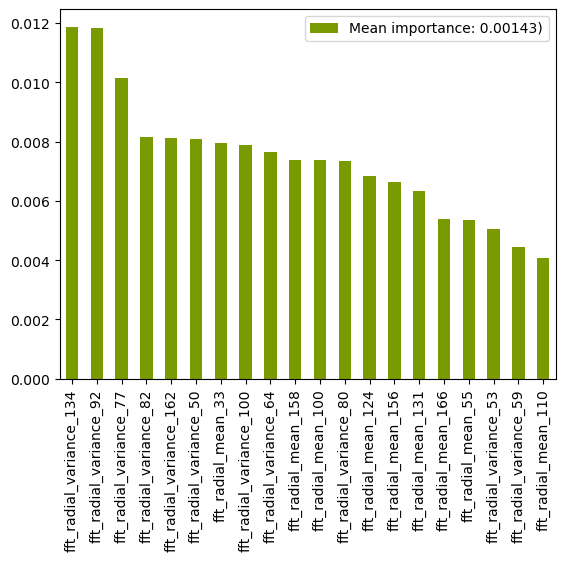

In [215]:
from matplotlib import pyplot as plt

feature_rows = df_feature_importance[df_feature_importance.index.str.contains("fft")]
# 
# feature_rows = pd.concat([
#     df_feature_importance[df_feature_importance.index.str.contains("fourier")],
#     feature_rows,])

# PLOTTING
# Define MAIA logo colors
lime_green = '#A4C639'
dark_lime_green = '#7A9A01'
dark_gray = '#4A4A4A'


plot_df = feature_rows.sort_values("importance", ascending=False).head(20)
filetered_rows_mean = feature_rows.importance.mean()
print(filetered_rows_mean)

# Plot with MAIA colors and rotated x-axis labels, ensuring all labels show
ax = plot_df.plot(kind='bar', color=[dark_lime_green, dark_gray], legend=False)
plt.xticks(rotation=90)
# plt.axhline(filetered_rows_mean, color=dark_gray)

custom_labels = [f"Mean importance: {filetered_rows_mean:.5f})"]
plt.legend(custom_labels, loc='upper right')

# Ensure all labels show by setting ticks to match index positions
ax.set_xticks(range(len(plot_df)))
ax.set_xticklabels(plot_df.index)
pass

# ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

pipeline.fitted_classifiers[idx].fit(pipeline.feature_matrix, pipeline.labels)
a = pipeline.fitted_classifiers[idx].predict_proba(val_feature_matrix)
y_pred = pipeline.fitted_classifiers[idx].predict(val_feature_matrix)
_, y_prob = a[:,0], a[:,1]

0.8524762908324552
(3796,)
[0 0 0 ... 0 0 1]
0.9253246383612652


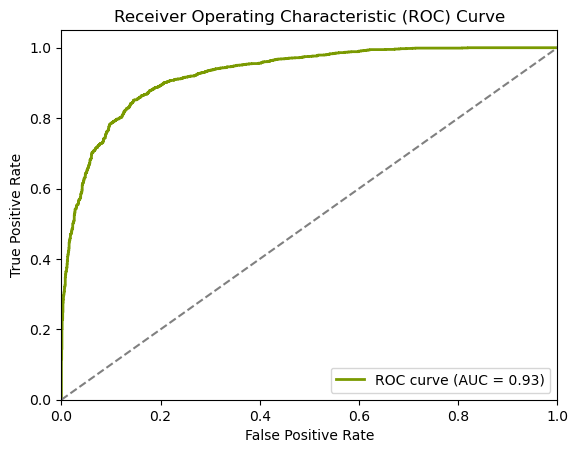

In [210]:

print(accuracy_score(val_labels, y_pred))


print(y_prob.shape)
print(y_pred)


fpr, tpr, thresholds = roc_curve(val_labels, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color=dark_lime_green, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()